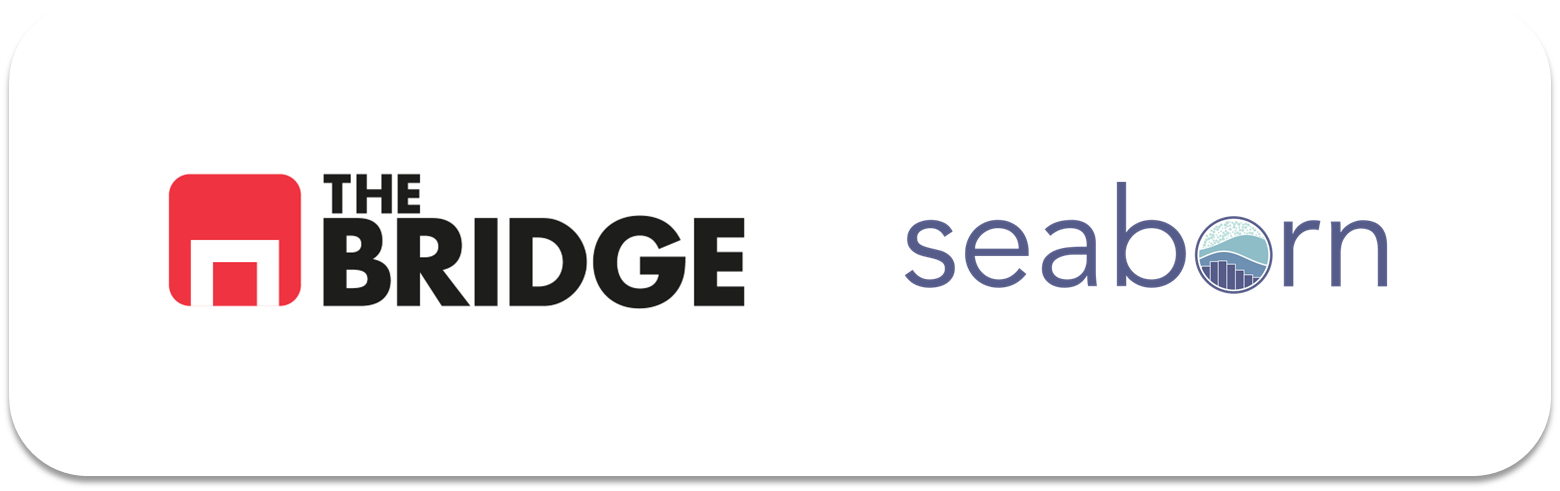

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [6]:
df_cali = pd.read_csv("./data/california_cities.csv", index_col=0)
df_cali.dropna(inplace=True)

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [48]:
def dispersion_hasta_cuatro(df, col_x, col_y, col_color = None, size = None, escala = 1):
    minimo = df[size].min() * 0.5
    maximo = df[size].max() * 0.5
    fig, axs = plt.subplots(1,1,figsize = (10,8))
    axs.set_title(f"Diagrama de dispersión de {col_x} y {col_y}")
    if size and col_color:
        if type(size) == str:
            sns.scatterplot(x = col_x, y = col_y, size = df[size] * escala, sizes = (minimo, maximo), hue = col_color, data=df, alpha = .7)
        else:
            sns.scatterplot(x = col_x, y = col_y, s = size, hue = col_color, data=df, alpha = .7)
    elif size:
        if type(size) == str:
            sns.scatterplot(x = col_x, y = col_y, size = df[size] * escala, sizes = (minimo, maximo), data=df, alpha = .7, color = "green")
        else:
            sns.scatterplot(x = col_x, y = col_y, s = size, data=df, alpha = .7, color = "green")
    elif col_color:
        sns.scatterplot(x = col_x, y = col_y, color = col_color, data=df, alpha = .7, s = 35, cmap = "viridis")
    else:
        sns.scatterplot(x = col_x, y = col_y, data=df, alpha = .7, color = "green", s = 35)

    
    plt.show();



In [8]:
df_cali.head()

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

In [20]:
df_cali["log_poblacion"] = np.log10(df_cali["population_total"])

In [38]:
df_cali["area_total_km2"].max() * 1.1

np.float64(1432.2)

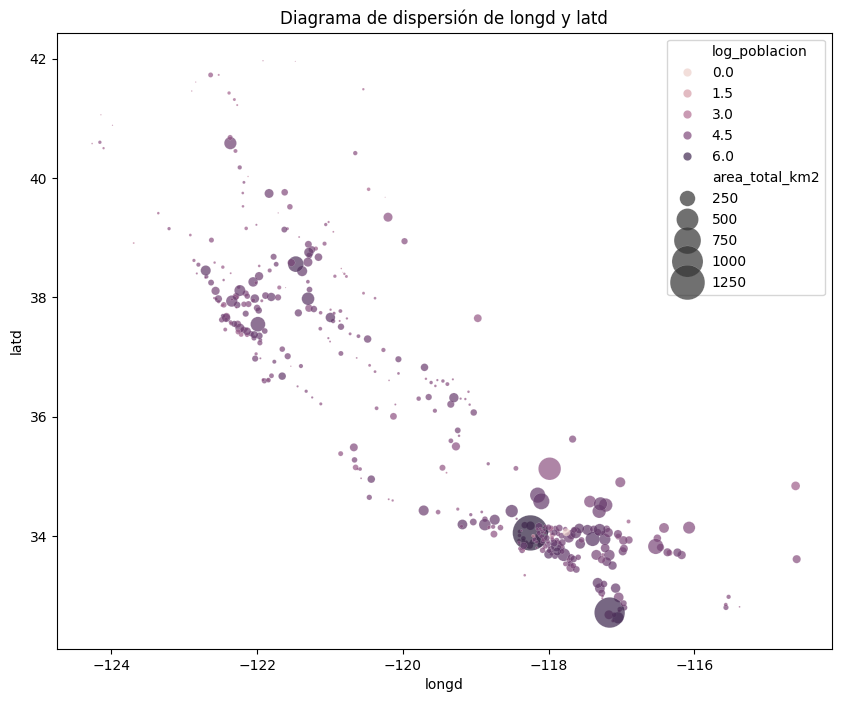

In [49]:
dispersion_hasta_cuatro(df_cali, "longd", "latd", col_color= "log_poblacion", size="area_total_km2")

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

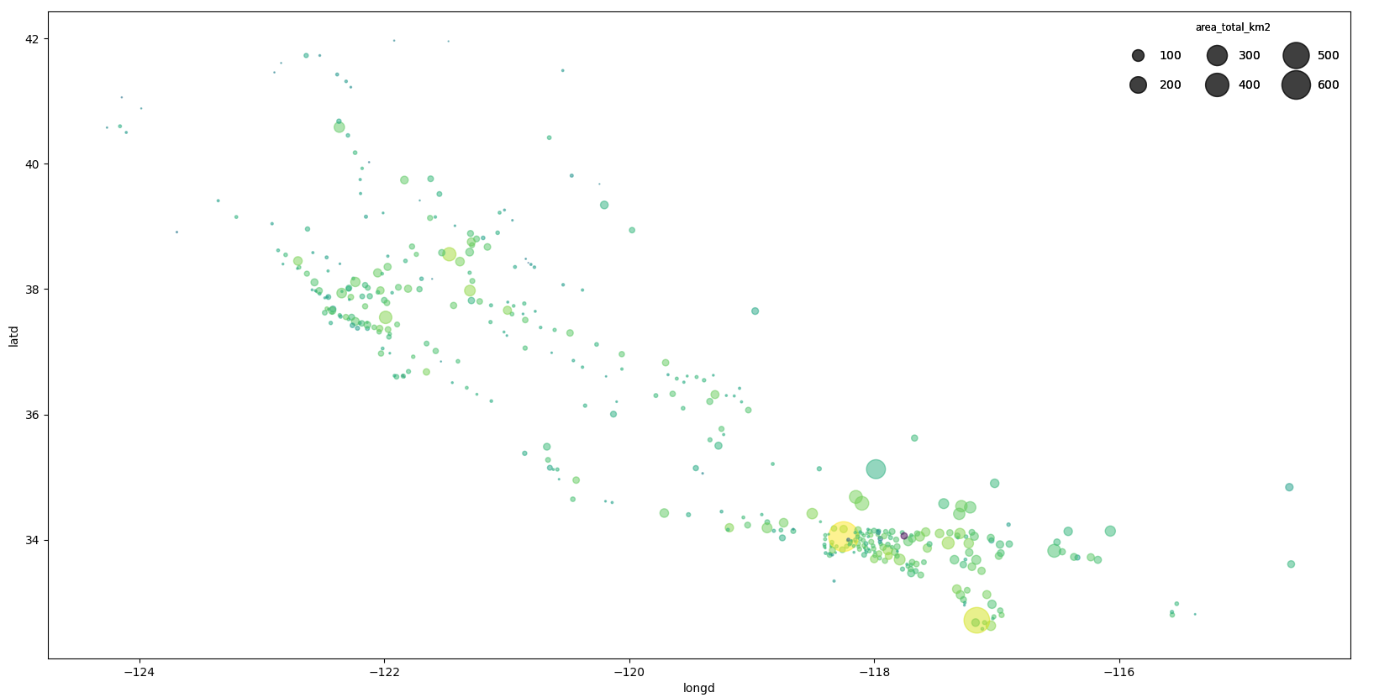

In [62]:
def pinta_categoricas(df, columnas_cat, relativa = False):
    num_columnas = len(columnas_cat)
    num_filas = (num_columnas // 2) + (num_columnas % 2)
    fig, axs = plt.subplots(num_filas, 2, figsize = (15, 5 * num_filas))
    axs = axs.flatten()
    for i, col in enumerate(columnas_cat):
        if relativa:
            columna = pd.DataFrame(df[col].value_counts(normalize = True) * 100)
            columna.columns = ["frecuencias_relativas"]
            sns.barplot(x = columna.index, y = columna["frecuencias_relativas"], palette="viridis", data=columna, hue=columna.index, ax = axs[i])
            axs[i].set_title(f"Distribución de {col}")
            for k in axs[i].containers:
                labels = [f"{v.get_height():.1f}" for v in k]
                axs[i].bar_label(k, labels = labels)
            
        else:
            sns.countplot(x = col, data=df, palette="viridis", hue=col, ax = axs[i])
            axs[i].set_title(f"Distribución de {col}")
            axs[i].set_ylabel('Frecuencia')
            for k in axs[i].containers:
                axs[i].bar_label(k,)
    for j in range(i + 1, num_filas * 2):
        axs[j].axis('off')
    plt.tight_layout()
    plt.show();

In [51]:
def pinta_histograma(df, columnas_num, bins = "auto", kde = True):
    
    num_columnas = len(columnas_num)
    num_filas = (num_columnas // 2) + (num_columnas % 2)
    fig, axs = plt.subplots(num_filas, 2, figsize = (15, 5 * num_filas))
    axs = axs.flatten()
    for i, col in enumerate(columnas_num):
        if type(bins) == list:
            sns.histplot(x = col, kde = kde, data=df, bins=bins[i], ax = axs[i])
        else:
            sns.histplot(x = col, kde = kde, data=df, bins=bins, ax = axs[i])
            
        axs[i].set_title(f"Histograma y KDE de {col}")
        axs[i].set_ylabel('Número de valores')
    
    for j in range(i + 1, num_filas * 2):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show();

In [53]:
def pinta_histogramas_cat_num(df, columna_cat, columna_num, bins = "auto", kde = True):
    
    num_columnas = df[columna_cat].nunique()
    num_filas = (num_columnas // 3)
    if num_columnas % 3 != 0:
        num_filas += 1
    fig, axs = plt.subplots(num_filas, 3, figsize = (12, 4 * num_filas))
    axs = axs.flatten()
    for i, val in enumerate(df[columna_cat].unique()):
        valores_x = df.loc[df[columna_cat] == val, columna_num]
        sns.histplot(x = valores_x, kde = kde, data=df, bins=bins, ax = axs[i], hue=columna_cat)
            
        axs[i].set_title(f"Histograma y KDE de {columna_num}, {val}")
        axs[i].set_ylabel('Número de valores')

        plt.legend([], [], frameon = False)
    
    for j in range(i + 1, num_filas * 3):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show();

In [102]:
def comparacion_categoricas(df, col_1, col_2, col_3 = None, relativa = False):
    if col_3:
        columnas = [col_1, col_2, col_3]
    else:
        columnas = [col_1, col_2]
        tabla_contingencia = pd.crosstab(df[col_1], df[col_2], margins=False)
        print(tabla_contingencia)
    fig, axs = plt.subplots(1,len(columnas), figsize = (10, 6))
    fig.suptitle(f"Comparacion de {", ".join(columnas)} ")
    
    for i, col in enumerate(columnas):

        if relativa:
            relativas = pd.DataFrame(df[col].value_counts(normalize = True) * 100)
            relativas.columns = ["frecuencias_relativas"]
            sns.barplot(x = relativas.index , y = "frecuencias_relativas", data = relativas, hue= relativas.index, ax = axs[i])
            axs[i].set_title(f"Gráfico de barras de {col}")
            axs[i].set_ylabel("Frecuencia absoluta")
            for k in axs[i].containers:
                labels = [f"{v.get_height():.1f}%" for v in k]
                axs[i].bar_label(k, labels = labels)

        else:
            sns.countplot(x = col, data = df, hue= col, ax = axs[i])
            axs[i].set_title(f"Gráfico de barras de {col}")
            axs[i].set_ylabel("Frecuencia absoluta")
            for k in axs[i].containers:
                axs[i].bar_label(k,)

            
    plt.tight_layout();

    if relativa:
        if col_3:
            relativas = df.groupby([col_2, col_3], as_index = False)[col_1].value_counts(normalize = True)
            relativas["proportion"] *= 100
            fig2 = sns.catplot(x = col_1, y = "proportion", col = col_2, hue = col_3, data= relativas, kind = "bar")
            for ax in fig2.axes.ravel():
                for k in ax.containers:
                    labels = [f"{v.get_height():.1f}%" for v in k]
                    ax.bar_label(k, labels = labels)
        else:
            relativas = df.groupby([col_2], as_index = False)[col_1].value_counts(normalize = True)
            relativas["proportion"] *= 100
            fig2 = sns.catplot(x = col_1, y = "proportion", col = col_2, hue = col_1, data= relativas, kind = "bar")
            for ax in fig2.axes.ravel():
                for k in ax.containers:
                    labels = [f"{v.get_height():.1f}%" for v in k]
                    ax.bar_label(k, labels = labels)
    else:
        if col_3:
            fig2 = sns.catplot(x = col_1, col = col_2, hue = col_3, data= df, kind = "count")
            for ax in fig2.axes.ravel():
                for k in ax.containers:
                    ax.bar_label(k,)
        else:
            fig2 = sns.catplot(x = col_1, col = col_2, hue = col_1, data= df, kind = "count")
            for ax in fig2.axes.ravel():
                for k in ax.containers:
                    ax.bar_label(k,)
    
    plt.show();

In [55]:
df_titanic = pd.read_csv("./data/titanic.csv")

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

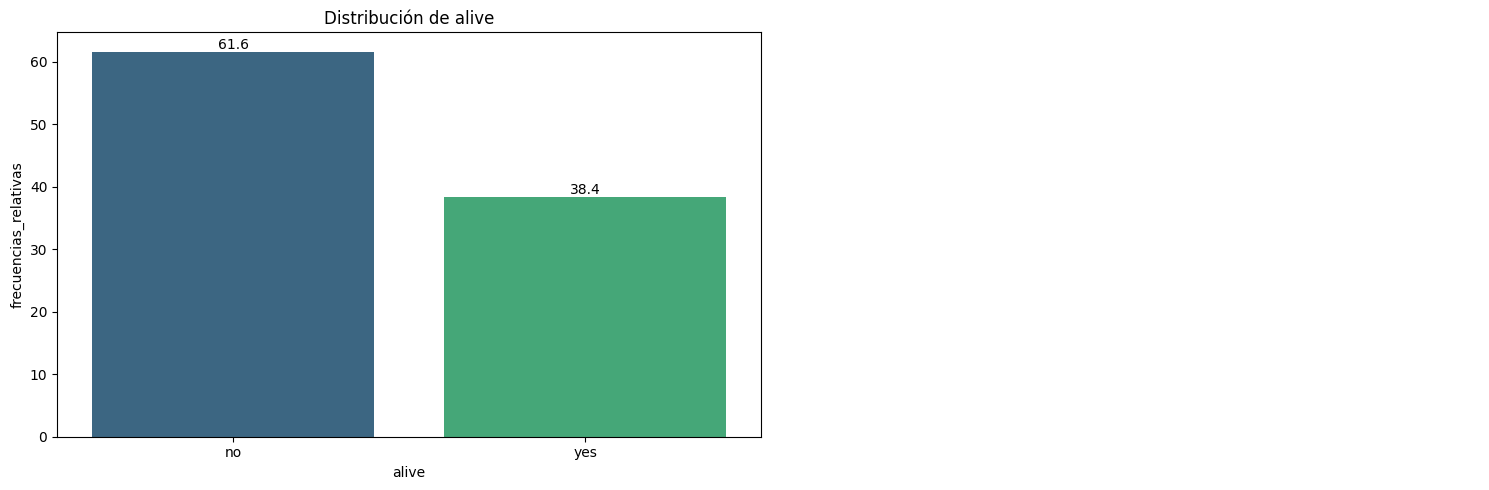

In [ ]:
pinta_categoricas(df_titanic, ["alive"], relativa=True)

who    child  man  woman
alive                   
no        34  449     66
yes       49   88    205


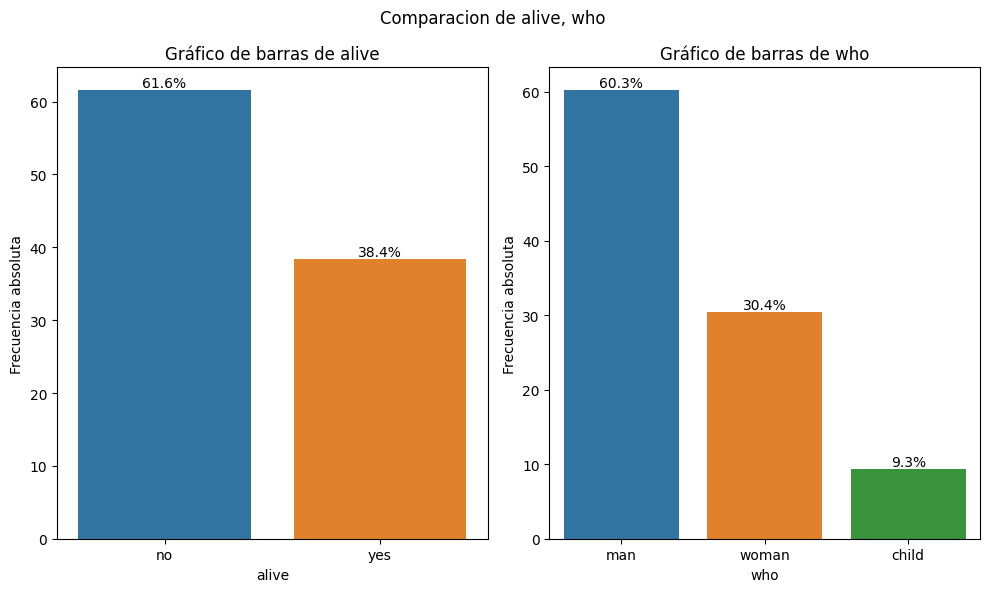

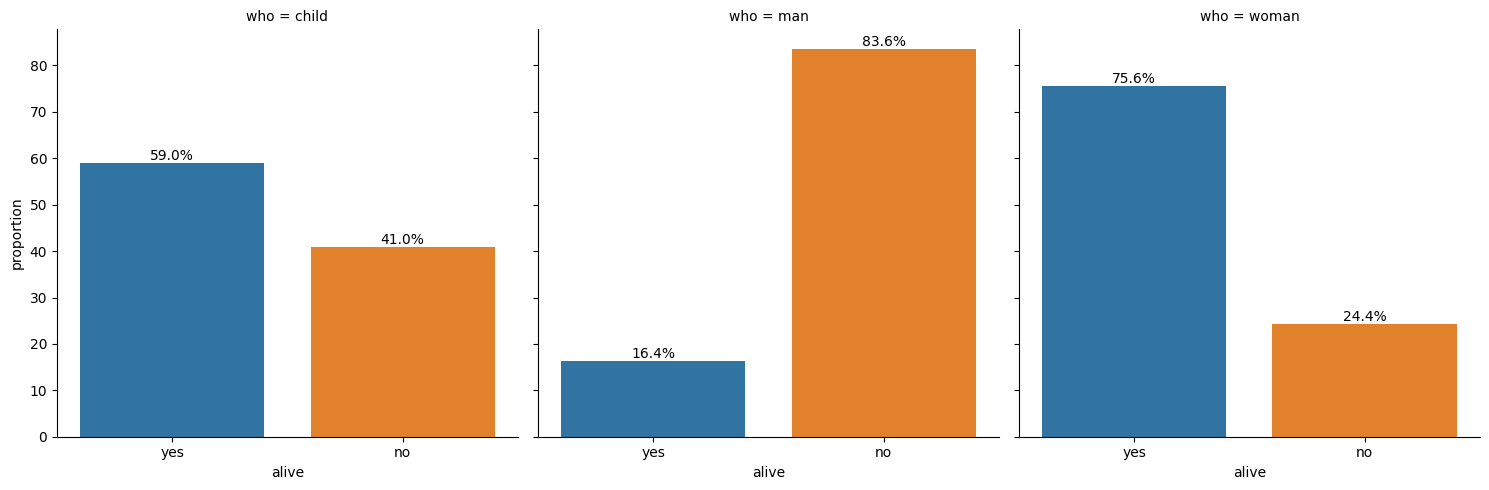

In [103]:
comparacion_categoricas(df_titanic, "alive", "who", relativa=True)

class  First  Second  Third
alive                      
no        80      97    372
yes      136      87    119


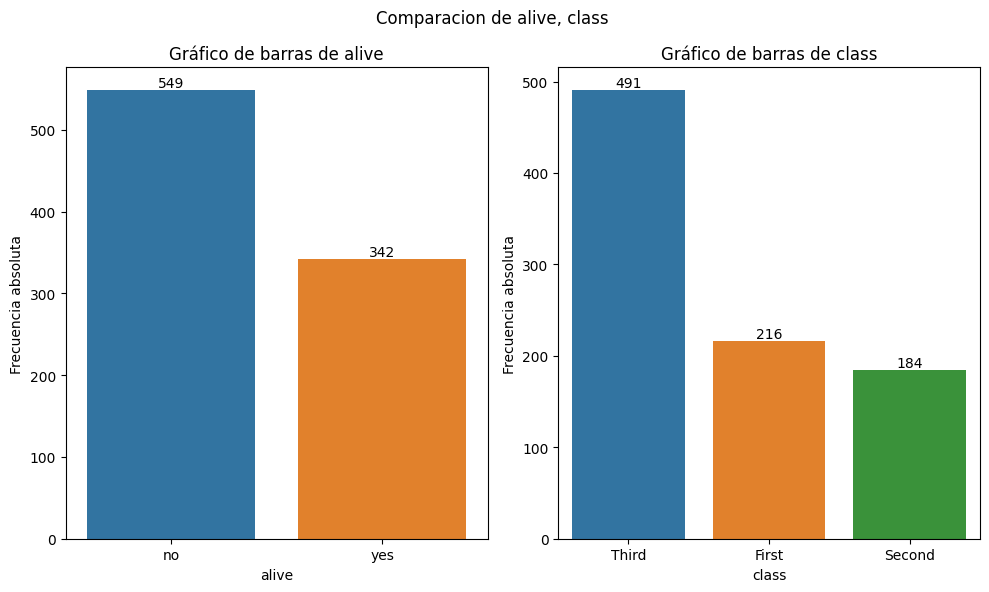

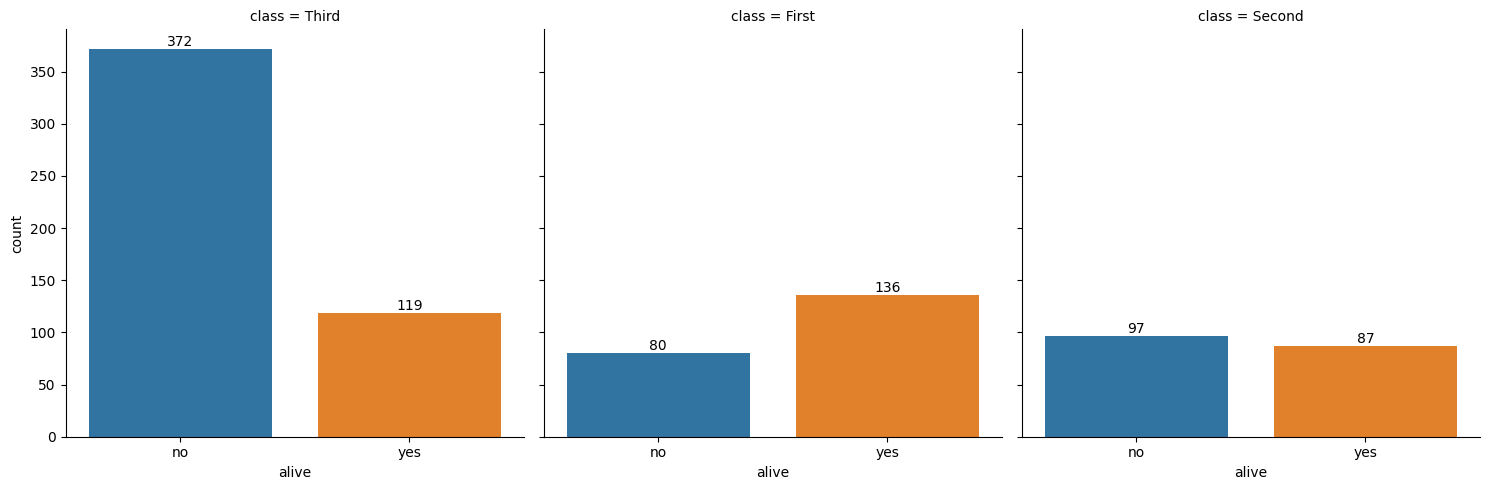

In [100]:
comparacion_categoricas(df_titanic, "alive", "class")

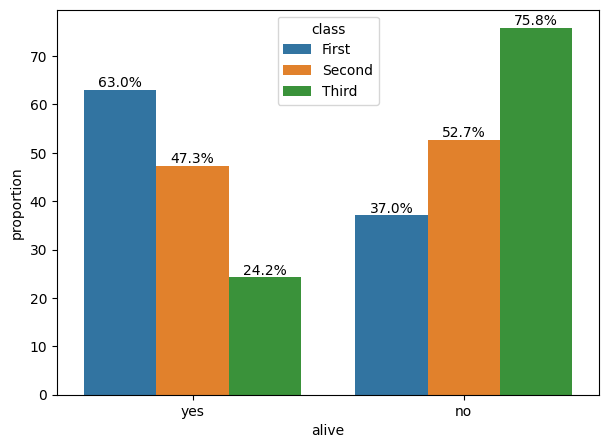

In [99]:
relativas = df_titanic.groupby("class", as_index=False)["alive"].value_counts(normalize=True)
relativas["proportion"] *= 100
fig, axs = plt.subplots(1,1, figsize = (7,5))
sns.barplot(x = "alive", y = "proportion", hue = "class", data=relativas)
for k in axs.containers:
    labels = [f"{v.get_height():.1f}%" for v in k]
    axs.bar_label(k, labels = labels)

who     child  woman
class               
First       6     91
Second     19     66
Third      58    114


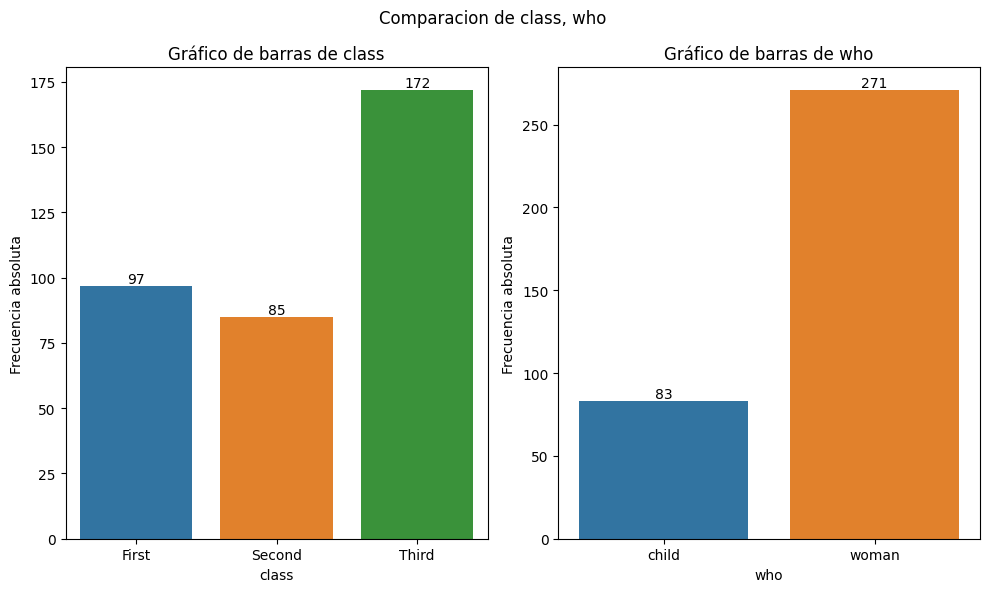

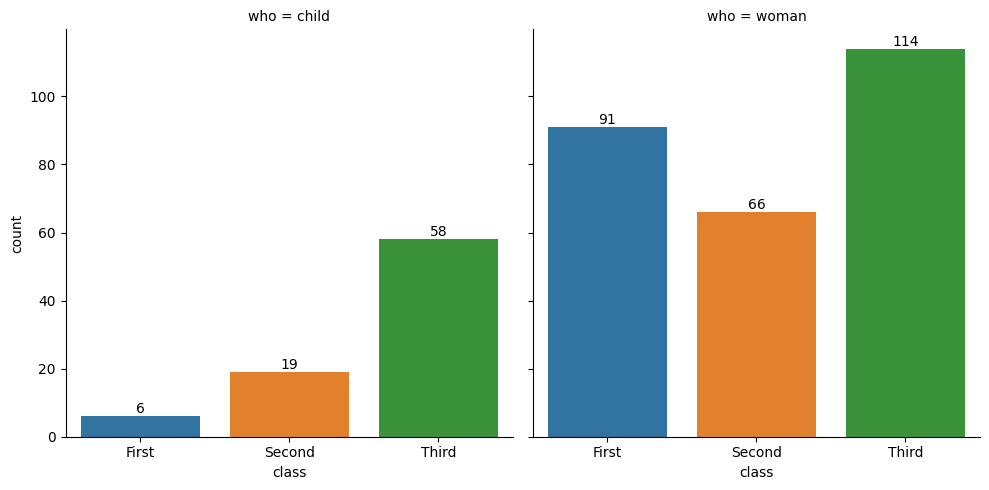

In [108]:
comparacion_categoricas(df_titanic.sort_values("class").loc[(df_titanic["who"] == "woman") | (df_titanic["who"] == "child")], "class", "who")

embark_town  Cherbourg  Queenstown  Southampton
class                                          
First               85           2          127
Second              17           3          164
Third               66          72          353


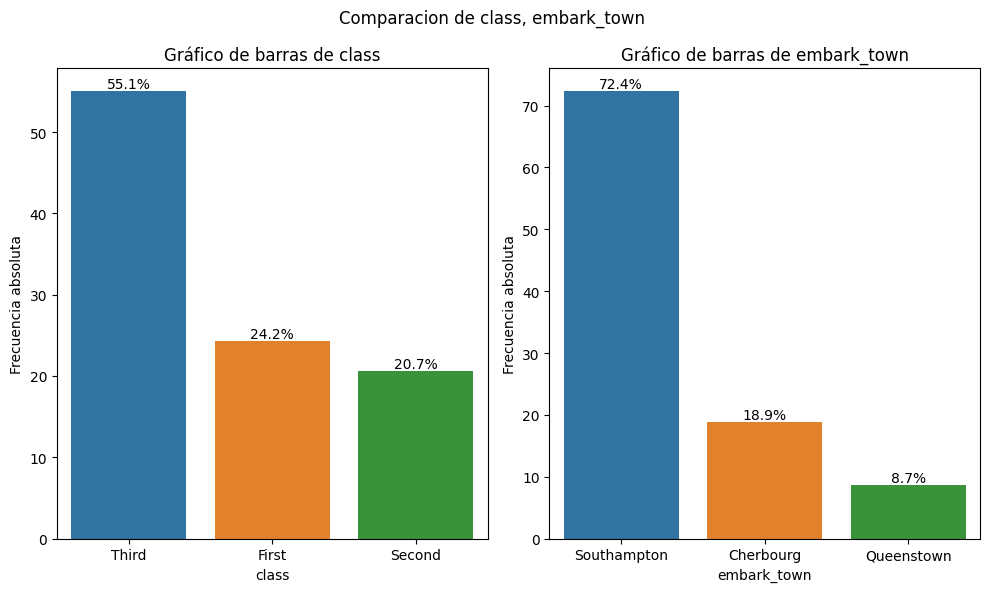

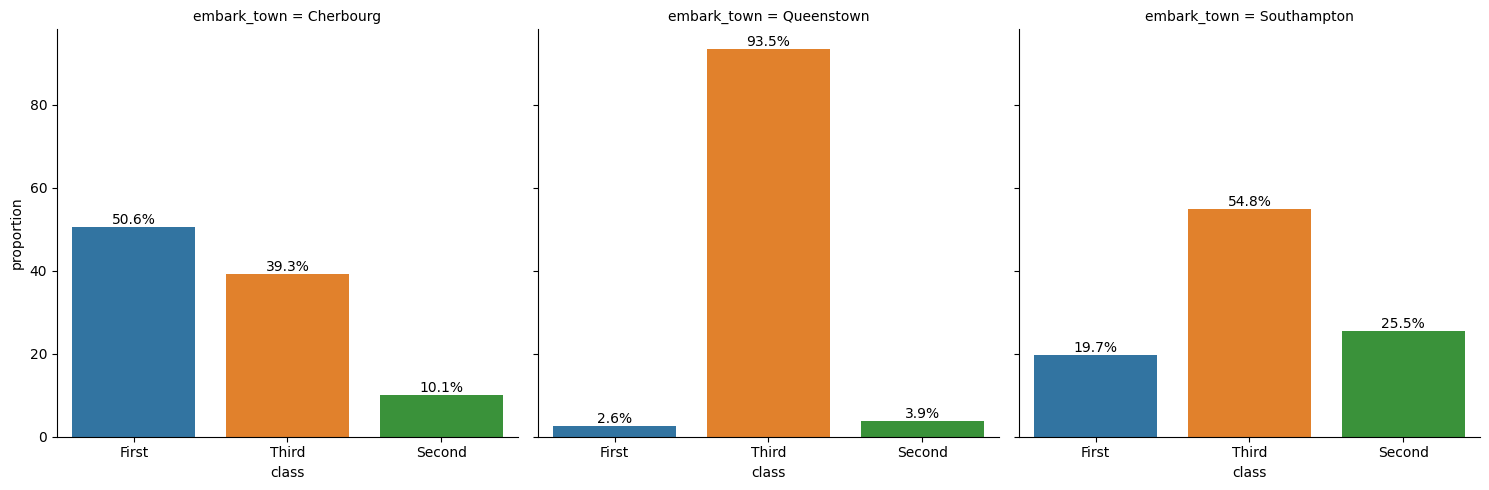

In [118]:
comparacion_categoricas(df_titanic, "class", "embark_town", relativa=True)

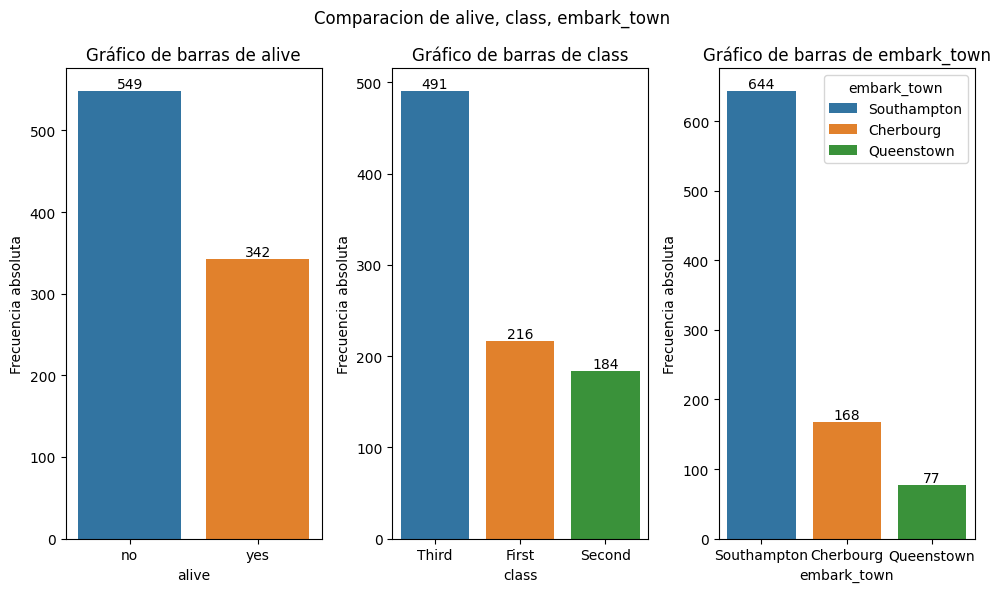

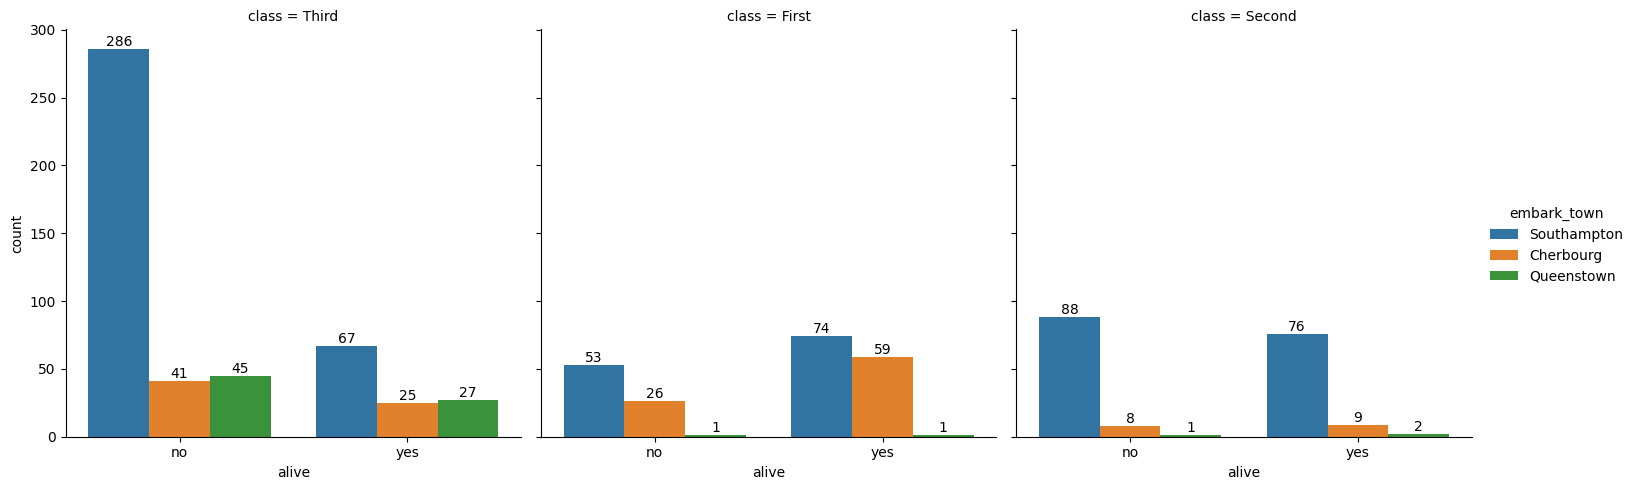

In [94]:
comparacion_categoricas(df_titanic, "alive", "class", "embark_town")

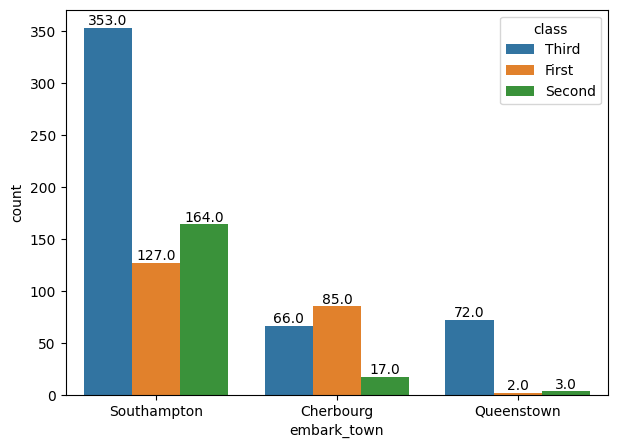

In [129]:
relativas = df_titanic.sort_values("class").groupby("embark_town", as_index=False)["class"].value_counts(normalize=True)
relativas["proportion"] *= 100
fig, axs = plt.subplots(1,1, figsize = (7,5))
sns.countplot(x = "embark_town", hue = df_titanic["class"].sort_values(), data=df_titanic)
for k in axs.containers:
    labels = [f"{v.get_height():.1f}" for v in k]
    axs.bar_label(k, labels = labels)